In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data set

In [2]:
data=pd.read_excel(r'C:\Users\Smitha.s1_oob\OneDrive - GEMS Education\Desktop\iris.xls')
print(data.head())

    SL   SW   PL   PW Classification
0  5.1  3.5  1.4  0.2    Iris-setosa
1  4.9  3.0  1.4  0.2    Iris-setosa
2  NaN  3.2  1.3  0.2    Iris-setosa
3  4.6  3.1  1.5  0.2    Iris-setosa
4  5.0  3.6  1.4  0.2    Iris-setosa


# Exploratory data analysis

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SL                143 non-null float64
SW                144 non-null float64
PL                144 non-null float64
PW                150 non-null float64
Classification    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for null values

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
#Replacing all missing values with mean of data
data['SL'] = data['SL'].fillna(data['SL'].mean())
data['SW'] = data['SW'].fillna(data['SW'].mean())
data['PL'] = data['PL'].fillna(data['PL'].mean())


In [8]:
#check for null values again
data.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
#Label encoding of target column
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()  
data['Classification']= label_encoder.fit_transform(data['Classification'])  
data['Classification'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [11]:
#splitting into training and test set
x=data.drop('Classification',axis=1)#features
y=data['Classification']#Target
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# Implementation of KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [13]:
acc_values

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

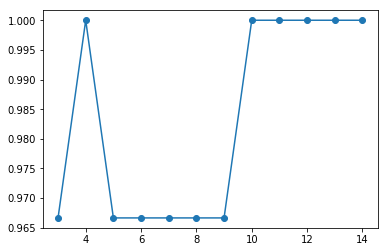

In [14]:
plt.plot(neighbors,acc_values,'o-')
plt.show()

In [15]:
#KNN with k=4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [27]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='micro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9333333333333333
Precision is 0.9393939393939394
Recall is 0.9333333333333333
F1 score is 0.9333333333333332


In [21]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [23]:
data.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667,1.000000
std,0.808480,0.421884,1.725479,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [30]:
print('Accuracy is',accuracy_score(y_test,y_pred))
print('Precision is',precision_score(y_test,y_pred,average='macro'))
print('Recall is',recall_score(y_test,y_pred,average='micro'))
print('F1 score is',f1_score(y_test,y_pred,average='macro'))

Accuracy is 0.9333333333333333
Precision is 0.9393939393939394
Recall is 0.9333333333333333
F1 score is 0.9333333333333332


In [33]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  2,  9]], dtype=int64)

KNN accuracy=93% after applying standard scaling 

# Implementation of Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

Accuracy of model=96% 

# Implementation of Decision Tree algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()


In [ ]:
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [ ]:
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

# Out of the 3 implemented models,Random forest can be chosen since it has an accuracy of 96%